In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn import metrics

In [51]:
load_rfmodel1 = joblib.load('240106_my_rf_new_all_exp_dockcon_tun25_DockCon01.joblib')

In [52]:
load_lgmodel1 = joblib.load('my_LogReg_base_tun_01.joblib')

In [53]:
dtr = pd.read_csv("data_final_train.csv", index_col=0)
dtr

,exp_biob,DockCon_cl,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
Name,,,,,,,,,,,,,,,,,,,,,
52,0,0,0,-0.3802,0.144552,61.4447,53.189411,6,6,49,...,305.199094,6.228553,43.089470,10.850958,7.840514,3.010445,1411,26,4.233,98
19,1,0,0,-0.4491,0.201691,14.5530,21.820344,6,6,19,...,152.047344,8.002492,21.384643,7.694133,7.694133,0.000000,160,13,1.391,50
75,0,1,0,-1.8144,3.292047,22.6060,38.411516,12,12,32,...,272.068473,8.502140,40.840445,13.365816,13.365816,0.000000,788,33,0.897,108
64,1,0,0,-2.6675,7.115556,37.5425,37.402688,6,6,35,...,272.089603,7.773989,37.857235,18.767236,18.767236,0.000000,716,30,-0.238,96
23,1,0,0,-0.0406,0.001648,19.3042,24.913930,6,6,22,...,166.062994,7.548318,23.406510,7.978284,7.978284,0.000000,194,16,2.675,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,1,0,0,-0.9206,0.847504,5.1292,16.164758,6,6,14,...,110.036779,7.859770,15.532829,4.990326,4.990326,0.000000,62,7,0.870,36
18,1,0,0,-0.7296,0.532316,22.5410,24.006758,6,6,19,...,174.031694,9.159563,26.188765,7.610215,7.610215,0.000000,218,21,1.839,68
47,1,1,0,-0.9639,0.929103,19.1009,35.473930,12,12,28,...,238.062994,8.502250,37.140671,8.291271,8.291271,0.000000,591,28,4.126,96


In [54]:
ytr = dtr.iloc[:,0]

In [55]:
xtr = dtr.iloc[:,1:]

In [56]:
dts = pd.read_csv("data_final_test.csv", index_col=0)
dts

,exp_biob,DockCon_cl,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
Name,,,,,,,,,,,,,,,,,,,,,
72,0,0,0,-2.7118,7.353859,57.7415,60.181032,12,12,54,...,420.142032,7.780408,60.361553,24.143606,24.143606,0.000000,2753,49,1.673,154
32,0,0,0,-2.6559,7.053805,42.2547,40.496274,6,6,38,...,286.105253,7.529086,39.881783,18.742569,18.742569,0.000000,798,33,-0.084,100
37,1,0,1,-0.6653,0.442624,14.3331,21.820344,6,6,19,...,152.047344,8.002492,21.392285,7.307393,7.307393,0.000000,162,11,1.273,50
78,0,0,0,-0.9206,0.847504,5.1292,16.164758,6,6,14,...,110.036779,7.859770,15.533410,4.978279,4.978279,0.000000,60,8,1.299,36
53,0,0,0,0.5558,0.308914,44.4651,29.070688,0,0,27,...,152.120115,5.634078,21.443126,2.497885,2.497885,0.000000,139,15,2.434,64
54,0,0,0,0.9432,0.889626,44.2816,30.404274,0,0,29,...,154.135765,5.315026,21.773285,2.521656,2.521656,0.000000,123,19,2.734,66
61,0,1,0,-1.8770,3.523129,42.8946,59.427411,12,12,52,...,337.204179,6.484696,50.849117,8.437645,5.123879,3.313767,1634,37,6.146,126
83,0,0,0,-0.9670,0.935089,29.5775,23.658344,5,5,21,...,180.064725,8.574511,25.928536,17.556611,5.040997,12.515614,211,22,-0.435,70
45,1,0,0,-3.9997,15.997600,55.1109,58.847446,12,12,52,...,418.126382,8.040892,61.114599,23.433551,23.433551,0.000000,2054,62,-0.688,166


In [57]:
yts = dts.iloc[:,0]

In [58]:
xts = dts.iloc[:,1:]

In [11]:
ytr_rf_pred = load_rfmodel1.predict(xtr)
ytr_rf_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [12]:
ytr_lg_pred = load_lgmodel1.predict(xtr)
ytr_lg_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [13]:
ypred_rf = load_rfmodel1.predict(xts)
ypred_rf

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0])

In [14]:
ypred_lg = load_lgmodel1.predict(xts)
ypred_lg

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0])

In [15]:
accuracy_rf = accuracy_score(yts, ypred_rf)
print("Accuracy of RF model wo Docking =", accuracy_rf)

Accuracy of RF model wo Docking = 0.6956521739130435


In [16]:
accuracy_lg = accuracy_score(yts, ypred_lg)
print("Accuracy of LG model wo Docking =", accuracy_lg)

Accuracy of LG model wo Docking = 0.5652173913043478


Training Set RF model w/o docking
ROC score train set RF w/o Docking = 1.0
ROC score test set RF model w/o Docking = 0.6706349206349207


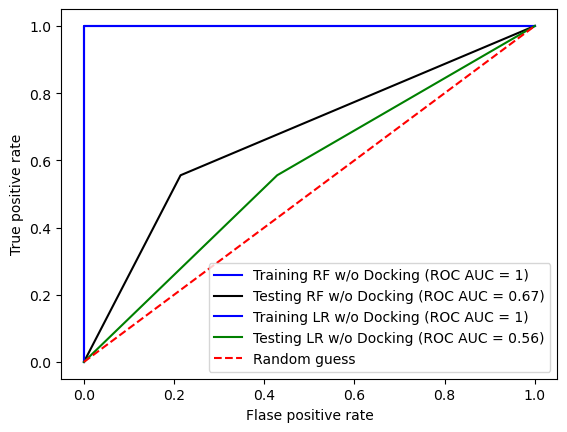

In [18]:
fpr, tpr, _ = roc_curve(ytr, ytr_rf_pred)
plt.plot(fpr, tpr, color='blue', label="Training RF w/o Docking (ROC AUC = 1)")
fpr2, tpr2, _ = roc_curve(yts, ypred_rf)
plt.plot(fpr2, tpr2,color='black', label="Testing RF w/o Docking (ROC AUC = 0.67)")

fpr3, tpr3, _ = roc_curve(ytr, ytr_lg_pred)
plt.plot(fpr, tpr, color='Blue', label="Training LR w/o Docking (ROC AUC = 1)")
fpr4, tpr4, _ = roc_curve(yts, ypred_lg)
plt.plot(fpr4, tpr4,color='Green', label="Testing LR w/o Docking (ROC AUC = 0.56)")

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random guess")

plt.legend(loc='lower right')


plt.xlabel("Flase positive rate")
plt.ylabel("True positive rate")
#plt.savefig('figure6_1_RFwoDocking.png', dpi=300)


print('Training Set RF model w/o docking')
ROCtr = roc_auc_score(ytr,ytr_rf_pred)
print("ROC score train set RF w/o Docking =" ,ROCtr)
ROCts = roc_auc_score(yts,ypred_rf)
print("ROC score test set RF model w/o Docking =" ,ROCts)

In [19]:
cm1=confusion_matrix(ytr, ytr_rf_pred)
Sp = float(cm1[0,0])/(cm1[0,0]+cm1[0,1])
Sn=float(cm1[1,1])/(cm1[1,0]+cm1[1,1])
Sn=Sn*100
Sp=Sp*100
acc=accuracy_score(ytr, ytr_rf_pred)*100
f1=f1_score(ytr, ytr_rf_pred)*100
mcc=matthews_corrcoef(ytr, ytr_rf_pred)
roc=roc_auc_score(ytr, ytr_rf_pred)

In [20]:
print('Training RF model w/o docking')
print('True Positive: '+str(cm1[1,1]))
print('True Negative: '+str(cm1[0,0]))
print('False Positive: '+str(cm1[0,1]))
print('False Negative: '+str(cm1[1,0]))
print('Sensitivity: '+str(Sn))
print('Specificity: '+str(Sp))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(ytr, ytr_rf_pred)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

Training RF model w/o docking
True Positive: 27
True Negative: 39
False Positive: 0
False Negative: 0
Sensitivity: 100.0
Specificity: 100.0
Accuracy: 100.0
f1_score: 100.0
Recall score: 1.0
MCC: 1.0
ROC_AUC: 1.0


In [21]:
cm2=confusion_matrix(yts, ypred_rf)
Sp2 = float(cm2[0,0])/(cm2[0,0]+cm2[0,1])
Sn2=float(cm2[1,1])/(cm2[1,0]+cm2[1,1])
Sn2=Sn2*100
Sp2=Sp2*100
acc=accuracy_score(yts, ypred_rf)*100
f1=f1_score(yts, ypred_rf)*100
mcc=matthews_corrcoef(yts, ypred_rf)
roc=roc_auc_score(yts, ypred_rf)

In [22]:
print('Testing RF model w/o docking')
print('True Positive: '+str(cm2[1,1]))
print('True Negative: '+str(cm2[0,0]))
print('False Positive: '+str(cm2[0,1]))
print('False Negative: '+str(cm2[1,0]))
print('Sensitivity: '+str(Sn2))
print('Specificity: '+str(Sp2))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(yts, ypred_rf)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

Testing RF model w/o docking
True Positive: 5
True Negative: 11
False Positive: 3
False Negative: 4
Sensitivity: 55.55555555555556
Specificity: 78.57142857142857
Accuracy: 69.56521739130434
f1_score: 58.82352941176471
Recall score: 0.5555555555555556
MCC: 0.349697526139891
ROC_AUC: 0.6706349206349207


In [23]:
cm3=confusion_matrix(ytr, ytr_lg_pred)
Sp = float(cm3[0,0])/(cm3[0,0]+cm3[0,1])
Sn=float(cm3[1,1])/(cm3[1,0]+cm3[1,1])
Sn=Sn*100
Sp=Sp*100
acc=accuracy_score(ytr, ytr_lg_pred)*100
f1=f1_score(ytr, ytr_lg_pred)*100
mcc=matthews_corrcoef(ytr, ytr_lg_pred)
roc=roc_auc_score(ytr, ytr_lg_pred)

In [25]:
print('Training LR model w/o docking')
print('True Positive: '+str(cm3[1,1]))
print('True Negative: '+str(cm3[0,0]))
print('False Positive: '+str(cm3[0,1]))
print('False Negative: '+str(cm3[1,0]))
print('Sensitivity: '+str(Sn))
print('Specificity: '+str(Sp))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(ytr, ytr_lg_pred)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

Training LR model w/o docking
True Positive: 27
True Negative: 39
False Positive: 0
False Negative: 0
Sensitivity: 100.0
Specificity: 100.0
Accuracy: 100.0
f1_score: 100.0
Recall score: 1.0
MCC: 1.0
ROC_AUC: 1.0


In [26]:
cm4=confusion_matrix(yts, ypred_lg)
Sp4 = float(cm4[0,0])/(cm4[0,0]+cm4[0,1])
Sn4=float(cm4[1,1])/(cm4[1,0]+cm4[1,1])
Sn4=Sn4*100
Sp4=Sp4*100
acc=accuracy_score(yts, ypred_lg)*100
f1=f1_score(yts, ypred_lg)*100
mcc=matthews_corrcoef(yts, ypred_lg)
roc=roc_auc_score(yts, ypred_lg)

In [27]:
print('Testing LR model w/o docking')
print('True Positive: '+str(cm4[1,1]))
print('True Negative: '+str(cm4[0,0]))
print('False Positive: '+str(cm4[0,1]))
print('False Negative: '+str(cm4[1,0]))
print('Sensitivity: '+str(Sn4))
print('Specificity: '+str(Sp4))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(yts, ypred_lg)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

Testing LR model w/o docking
True Positive: 5
True Negative: 8
False Positive: 6
False Negative: 4
Sensitivity: 55.55555555555556
Specificity: 57.14285714285714
Accuracy: 56.52173913043478
f1_score: 50.0
Recall score: 0.5555555555555556
MCC: 0.12406456138646277
ROC_AUC: 0.5634920634920635


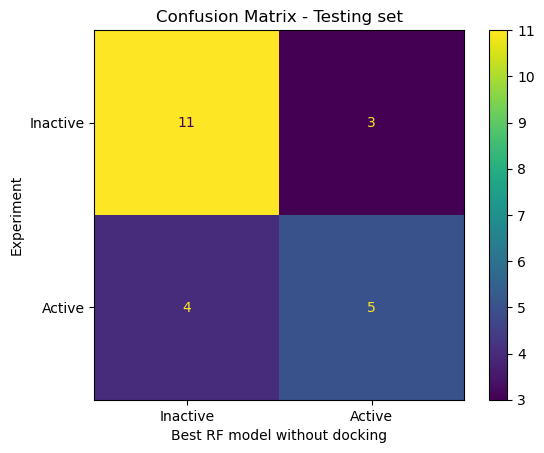

In [41]:
cm_test = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = ['Inactive', 'Active'])

cm_test.plot()
plt.title('Confusion Matrix - Testing set')
cm_test.ax_.set(xlabel='Best RF model without docking', ylabel='Experiment')
#plt.savefig('figure6_2_RFwoDocking.png', dpi=300)
plt.show()

In [59]:
print(str(load_rfmodel1.best_estimator_))

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=1)


In [60]:
im_features = load_rfmodel1.best_estimator_.feature_importances_

In [61]:
rf_best_importances = pd.Series(im_features, index=xtr.columns)

In [62]:
rf_best_importances_top = rf_best_importances.sort_values(ascending=False)

In [63]:
rf_best_importances_top.head(10)

SRW4                 0.015433
AATSC0m              0.012829
SpMin6_Bhe           0.012769
SpMax4_Bhm           0.011406
GATS4e               0.010824
ECCEN                0.010429
LipoaffinityIndex    0.009881
SpMax8_Bhe           0.009815
VR2_Dzi              0.009612
SpMAD_Dt             0.009069
dtype: float64

In [64]:
docking_result = rf_best_importances_top.loc[['DockCon_cl']]
docking_result

DockCon_cl    0.0
dtype: float64

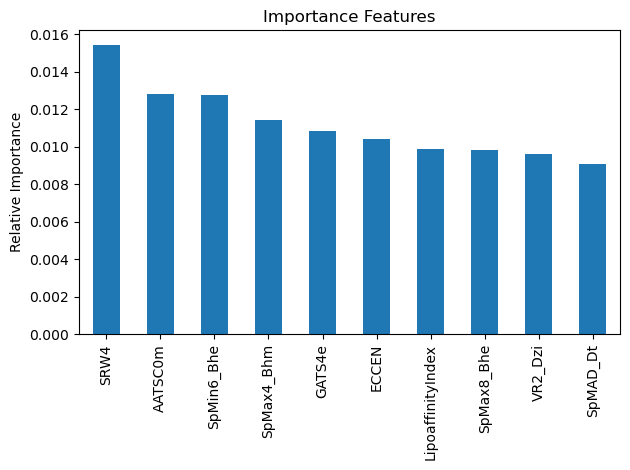

In [70]:
fig, ax = plt.subplots()
rf_best_importances_top.head(10).plot.bar(ax=ax)
ax.set_title("Importance Features")
ax.set_ylabel("Relative Importance")
fig.tight_layout()
#plt.savefig('figure7_1_RFwoDocking_Feat.png', dpi=300)

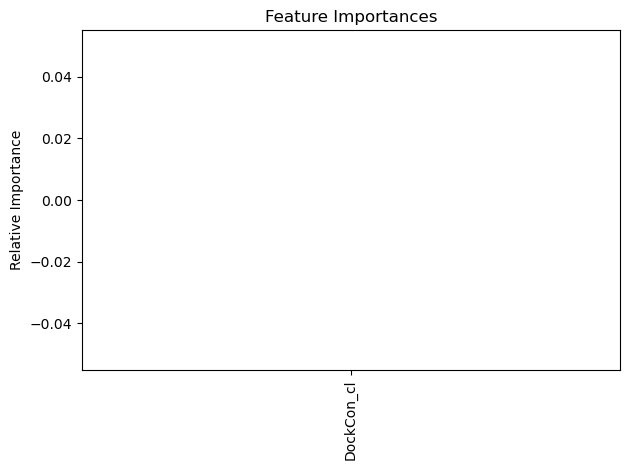

In [25]:
fig, ax = plt.subplots()
docking_result.plot.bar(ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Relative Importance")
fig.tight_layout()

In [28]:
load_rf_model22 = joblib.load('240106_my_rf_new_all_exp_dockcon_tun25_DockCon22.joblib')

In [29]:
load_lg_model06 = joblib.load('my_LogReg_base_tun_06.joblib')

In [30]:
ytr_rf_pred2 = load_rf_model22.predict(xtr)
ytr_rf_pred2

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [31]:
ypred2_rf = load_rf_model22.predict(xts)
ypred2_rf

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0])

In [32]:
ytr_lg_pred2 = load_lg_model06.predict(xtr)
ytr_lg_pred2

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [33]:
ypred2_lg = load_lg_model06.predict(xts)
ypred2_lg

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0])

In [34]:
accuracy2 = accuracy_score(yts, ypred2_rf)
print("Accuracy of RF model w Docking =", accuracy2)

Accuracy of RF model w Docking = 0.6521739130434783


In [35]:
accuracy3 = accuracy_score(yts, ypred2_lg)
print("Accuracy of LR model w Docking =", accuracy3)

Accuracy of LR model w Docking = 0.5217391304347826


Training Set RF model wt docking
ROC score train = 1.0
ROC score test = 0.6349206349206349
Training Set LG model wt docking
ROC score train = 1.0
ROC score test = 0.5079365079365079


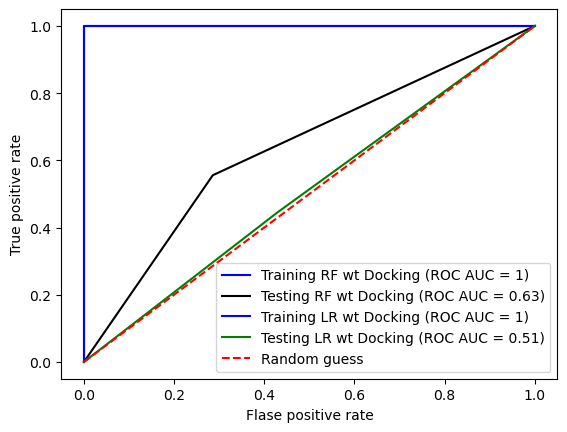

In [37]:
fpr2, tpr2, _ = roc_curve(ytr, ytr_rf_pred2)
plt.plot(fpr2, tpr2, color='blue', label="Training RF wt Docking (ROC AUC = 1)")
fpr2, tpr2, _ = roc_curve(yts, ypred2_rf)
plt.plot(fpr2, tpr2,color='black', label="Testing RF wt Docking (ROC AUC = 0.63)")

fpr3, tpr3, _ = roc_curve(ytr, ytr_lg_pred2)
plt.plot(fpr, tpr, color='Blue', label="Training LR wt Docking (ROC AUC = 1)")
fpr4, tpr4, _ = roc_curve(yts, ypred2_lg)
plt.plot(fpr4, tpr4,color='Green', label="Testing LR wt Docking (ROC AUC = 0.51)")

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random guess")

plt.legend(loc='lower right')


plt.xlabel("Flase positive rate")
plt.ylabel("True positive rate")
#plt.savefig('figure6_3_RFwtihDocking.png', dpi=300)


print('Training Set RF model wt docking')
ROCtr = roc_auc_score(ytr,ytr_rf_pred2)
print("ROC score train =" ,ROCtr)
ROCts = roc_auc_score(yts,ypred2_rf)
print("ROC score test =" ,ROCts)
print('Training Set LG model wt docking')
ROCtr2 = roc_auc_score(ytr,ytr_lg_pred2)
print("ROC score train =" ,ROCtr2)
ROCts2 = roc_auc_score(yts,ypred2_lg)
print("ROC score test =" ,ROCts2)

In [67]:
cm5=confusion_matrix(ytr, ytr_rf_pred2)
Sp5 = float(cm5[0,0])/(cm5[0,0]+cm5[0,1])
Sn5=float(cm5[1,1])/(cm5[1,0]+cm3[1,1])
Sn5=Sn5*100
Sp5=Sp5*100
acc=accuracy_score(ytr, ytr_rf_pred2)*100
f1=f1_score(ytr, ytr_rf_pred2)*100
mcc=matthews_corrcoef(ytr, ytr_rf_pred2)
roc=roc_auc_score(ytr, ytr_rf_pred2)

In [70]:
print('Training Set RF model wt docking')
print('True Positive: '+str(cm5[1,1]))
print('True Negative: '+str(cm5[0,0]))
print('False Positive: '+str(cm5[0,1]))
print('False Negative: '+str(cm5[1,0]))
print('Sensitivity: '+str(Sn5))
print('Specificity: '+str(Sp5))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(ytr, ytr_rf_pred2)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

Training Set RF model wt docking
True Positive: 27
True Negative: 39
False Positive: 0
False Negative: 0
Sensitivity: 100.0
Specificity: 100.0
Accuracy: 100.0
f1_score: 100.0
Recall score: 1.0
MCC: 1.0
ROC_AUC: 1.0


In [71]:
cm6=confusion_matrix(yts, ypred2_rf)
Sp6 = float(cm6[0,0])/(cm6[0,0]+cm6[0,1])
Sn6=float(cm6[1,1])/(cm6[1,0]+cm6[1,1])
Sn6=Sn6*100
Sp6=Sp6*100
acc=accuracy_score(yts, ypred2_rf)*100
f1=f1_score(yts, ypred2_rf)*100
mcc=matthews_corrcoef(yts, ypred2_rf)
roc=roc_auc_score(yts, ypred2_rf)

In [72]:
print('Testing Set RF model wt docking')
print('True Positive: '+str(cm6[1,1]))
print('True Negative: '+str(cm6[0,0]))
print('False Positive: '+str(cm6[0,1]))
print('False Negative: '+str(cm6[1,0]))
print('Sensitivity: '+str(Sn6))
print('Specificity: '+str(Sp6))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(yts, ypred2_rf)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

Testing Set RF model wt docking
True Positive: 5
True Negative: 10
False Positive: 4
False Negative: 4
Sensitivity: 55.55555555555556
Specificity: 71.42857142857143
Accuracy: 65.21739130434783
f1_score: 55.55555555555556
Recall score: 0.5555555555555556
MCC: 0.2698412698412698
ROC_AUC: 0.6349206349206349


In [73]:
cm7=confusion_matrix(ytr, ytr_lg_pred2)
Sp7 = float(cm7[0,0])/(cm7[0,0]+cm7[0,1])
Sn7=float(cm7[1,1])/(cm7[1,0]+cm7[1,1])
Sn7=Sn7*100
Sp7=Sp7*100
acc=accuracy_score(ytr, ytr_lg_pred2)*100
f1=f1_score(ytr, ytr_lg_pred2)*100
mcc=matthews_corrcoef(ytr, ytr_lg_pred2)
roc=roc_auc_score(ytr, ytr_lg_pred2)

In [74]:
print('Training LG model wt docking')
print('True Positive: '+str(cm7[1,1]))
print('True Negative: '+str(cm7[0,0]))
print('False Positive: '+str(cm7[0,1]))
print('False Negative: '+str(cm7[1,0]))
print('Sensitivity: '+str(Sn7))
print('Specificity: '+str(Sp7))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(ytr, ytr_lg_pred2)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

Training LG model wt docking
True Positive: 27
True Negative: 39
False Positive: 0
False Negative: 0
Sensitivity: 100.0
Specificity: 100.0
Accuracy: 100.0
f1_score: 100.0
Recall score: 1.0
MCC: 1.0
ROC_AUC: 1.0


In [75]:
cm8=confusion_matrix(yts, ypred2_lg)
Sp8 = float(cm8[0,0])/(cm8[0,0]+cm8[0,1])
Sn8=float(cm8[1,1])/(cm8[1,0]+cm8[1,1])
Sn8=Sn8*100
Sp8=Sp8*100
acc=accuracy_score(yts, ypred2_lg)*100
f1=f1_score(yts, ypred2_lg)*100
mcc=matthews_corrcoef(yts, ypred2_lg)
roc=roc_auc_score(yts, ypred2_lg)

In [76]:
print('Testing LG model wt docking')
print('True Positive: '+str(cm8[1,1]))
print('True Negative: '+str(cm8[0,0]))
print('False Positive: '+str(cm8[0,1]))
print('False Negative: '+str(cm8[1,0]))
print('Sensitivity: '+str(Sn8))
print('Specificity: '+str(Sp8))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(yts, ypred2_lg)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

Testing LG model wt docking
True Positive: 4
True Negative: 8
False Positive: 6
False Negative: 5
Sensitivity: 44.44444444444444
Specificity: 57.14285714285714
Accuracy: 52.17391304347826
f1_score: 42.10526315789474
Recall score: 0.4444444444444444
MCC: 0.015626907697949846
ROC_AUC: 0.5079365079365079


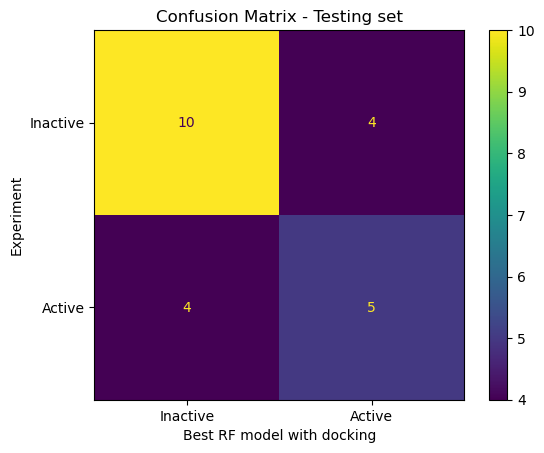

In [45]:
cm_test2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm4, display_labels = ['Inactive', 'Active'])

cm_test2.plot()
plt.title('Confusion Matrix - Testing set')
cm_test2.ax_.set(xlabel='Best RF model with docking', ylabel='Experiment')
#plt.savefig('figure6_4_RFwithDocking.png', dpi=300)
plt.show()

In [40]:
print(str(load_rf_model22.best_estimator_))

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=50,
                       random_state=22)


In [42]:
im_features2 = load_rf_model22.best_estimator_.feature_importances_

In [43]:
rf_best_importances2 = pd.Series(im_features2, index=xtr.columns)

In [44]:
rf_best_importances2_top = rf_best_importances2.sort_values(ascending=False)

In [45]:
rf_best_importances2_top.head(10)

TIC3          0.016582
VP-7          0.016198
ATS6m         0.015446
maxwHBa       0.013666
SpDiam_Dzv    0.013430
VR1_Dzi       0.012462
AATS6i        0.011108
VR1_Dze       0.010519
maxHBa        0.009917
EE_Dzp        0.009749
dtype: float64

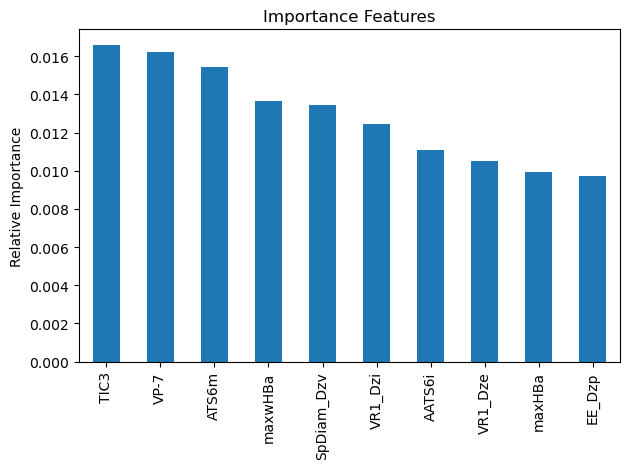

In [67]:
fig, ax = plt.subplots()
rf_best_importances2_top.head(10).plot.bar(ax=ax)
ax.set_title("Importance Features")
ax.set_ylabel("Relative Importance")
fig.tight_layout()
#plt.savefig('figure7_2_RFwDocking_Feat.png', dpi=300)

In [47]:
docking_result2 = rf_best_importances2_top.loc[['DockCon_cl']]
docking_result2

DockCon_cl    0.001709
dtype: float64

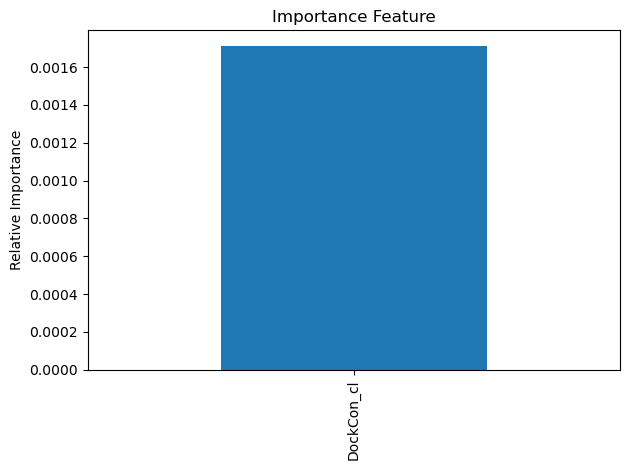

In [68]:
fig, ax = plt.subplots()
docking_result2.plot.bar(ax=ax)
ax.set_title("Importance Feature")
ax.set_ylabel("Relative Importance")
fig.tight_layout()
#plt.savefig('figure7_3_RFwDocking_Feat_docking.png', dpi=300)